In [1]:
!pip install robynpy==0.2.1

In [2]:
# Step 1: Import Necessary Libraries
import importlib
import robyn
import os
import pandas as pd

# Step 2: Load the `robyn` Package
pkg = importlib.import_module("robyn")

# Step 3: Define the Path to Tutorials
tutorials_path = pkg.__path__[0] + "/tutorials"

# Step 4: Load and Display Simulated Weekly Data
dt_simulated_weekly = pd.read_csv(tutorials_path + "/resources/dt_simulated_weekly.csv")
print("Simulated Data...")
print(dt_simulated_weekly.head())

# Step 5: Load and Display Prophet Holidays Data
dt_prophet_holidays = pd.read_csv(tutorials_path + "/resources/dt_prophet_holidays.csv")
print("Holidays Data...")
print(dt_prophet_holidays.head())

2025-03-20 22:26:51,226 - robyn - INFO - Logging is set up to console only.


Simulated Data...
         DATE       revenue          tv_S     ooh_S       print_S  \
0  2015-11-23  2.754372e+06  22358.346667       0.0  12728.488889   
1  2015-11-30  2.584277e+06  28613.453333       0.0      0.000000   
2  2015-12-07  2.547387e+06      0.000000  132278.4    453.866667   
3  2015-12-14  2.875220e+06  83450.306667       0.0  17680.000000   
4  2015-12-21  2.215953e+06      0.000000  277336.0      0.000000   

     facebook_I  search_clicks_P     search_S  competitor_sales_B  \
0  2.430128e+07         0.000000     0.000000             8125009   
1  5.527033e+06      9837.238486  4133.333333             7901549   
2  1.665159e+07     12044.119653  3786.666667             8300197   
3  1.054977e+07     12268.070319  4253.333333             8122883   
4  2.934090e+06      9467.248023  3613.333333             7105985   

    facebook_S events    newsletter  
0  7607.132915     na  19401.653846  
1  1141.952450     na  14791.000000  
2  4256.375378     na  14544.000000  


In [3]:
import pandas as pd

from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.enums import AdstockType, DependentVarType

In [4]:
monthly_data = pd.read_csv("CSV Input Files/Monthly_Master.csv")

In [5]:
rename_dict = {
    'Max Temp (°C)': 'Max_Temp_C',
    'Min Temp (°C)': 'Min_Temp_C',
    'Total Rain (mm)': 'Total_Rain_mm',
    'Mean Temp (°C)': 'Mean_Temp_C',
    'Heat Deg Days (°C)': 'Heat_Deg_Days_C',
    'Cool Deg Days (°C)': 'Cool_Deg_Days_C',
    'Snow on Grnd (cm)': 'Snow_on_Grnd_cm',
    'Content Marketing': 'Content_Marketing',
    'Online marketing': 'Online_Marketing',
    " Affiliates": 'Affiliates',
    "Total Snow (cm)": "Total_Snow_cm",
    "Total Precip (mm)": "Total_Precip_mm",
    "gmv": "revenue"
}

# Rename columns
monthly_data.rename(columns=rename_dict, inplace=True)

In [6]:
monthly_data.fillna(0)

,Unnamed: 0,Month_Year,revenue,units,sla,product_mrp,product_procurement_sla,order_date_only,is_holiday,Month,...,Radio,Other,NPS_Score,Stock_Index,List Price,Discount,Max_Temp_C,Min_Temp_C,is_sales,Holiday Week
0,2,2023-07,1980.946588,1.025428,6.181534,3299.582581,4.344711,2023-07-18 09:53:18.362707712,0.000316,7.0,...,0.00,0.000000,54.6,1177.0,2050.644094,0.000000,33.5,10.0,6761,3161
1,3,2023-08,1544.996310,1.014760,5.682657,2423.306273,2.678967,2023-08-25 20:32:46.051660544,0.022140,8.0,...,0.00,0.000000,60.0,1206.0,1586.811808,36.501729,33.5,15.0,20,26
2,4,2023-09,2029.912231,1.022973,5.745160,3281.805069,6.218172,2023-09-15 09:17:14.250150400,0.032944,9.0,...,0.00,0.000000,46.9,1101.0,2105.269435,0.000000,32.5,9.0,0,47651
3,5,2023-10,2442.223547,1.022373,5.599346,4439.025272,3.749480,2023-10-16 13:36:10.183452928,0.032865,10.0,...,0.00,0.000000,44.4,1210.0,2552.109523,0.000000,24.5,2.0,95456,52335
4,6,2023-11,2559.420651,1.024132,5.693794,4146.426281,4.558090,2023-11-13 22:31:34.684454400,0.039400,11.0,...,0.00,0.000000,47.0,1233.0,2670.889635,0.000000,23.0,-4.0,44289,66302
5,7,2023-12,2755.722445,1.030793,5.575659,4630.957149,5.107593,2023-12-16 01:52:13.311834880,0.056370,12.0,...,0.00,0.000000,45.8,1038.0,3018.841223,0.000000,16.0,-5.0,30713,30713
6,8,2024-01,2693.179760,1.021778,6.052473,4629.150847,4.974410,2024-01-15 23:36:45.152745984,0.031328,1.0,...,2.70,27.090000,47.1,1052.0,2836.856090,0.000000,11.0,-14.0,36791,34075
7,9,2024-02,2301.206585,1.020169,5.961516,3906.899198,4.885386,2024-02-15 10:35:08.969767680,0.091343,2.0,...,0.00,0.000000,50.3,1222.0,2393.405899,0.000000,17.5,-18.0,28607,53639
8,10,2024-03,2635.392930,1.021057,5.616168,4435.816378,4.804911,2024-03-14 21:18:47.420270080,0.083791,3.0,...,0.87,15.945545,49.0,1015.0,2758.699463,0.000000,20.5,-5.0,26162,79036
9,11,2024-04,2527.744351,1.018082,5.672267,4041.624005,5.214912,2024-04-16 18:56:25.859066880,0.000000,4.0,...,0.00,0.000000,51.8,1242.0,2635.916909,0.000000,25.0,-8.5,0,0


In [7]:
monthly_data.drop(columns=["Discount", "Other", "Radio", "Unnamed: 0"], inplace=True)

In [8]:
monthly_data.columns

Index(['Month_Year', 'revenue', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'order_date_only', 'is_holiday', 'Month',
       'Mean_Temp_C', 'Heat_Deg_Days_C', 'Cool_Deg_Days_C', 'Total_Rain_mm',
       'Total_Snow_cm', 'Total_Precip_mm', 'Snow_on_Grnd_cm',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_Marketing', 'Affiliates', 'SEM', 'NPS_Score', 'Stock_Index',
       'List Price', 'Max_Temp_C', 'Min_Temp_C', 'is_sales', 'Holiday Week'],
      dtype='object')

In [60]:
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",  # Target metric
    dep_var_type="revenue",
    date_var="order_date_only",
    context_vars=[
        "Stock_Index", 
        "units", 
        "sla", 
        "product_mrp", 
        "Mean_Temp_C",
        "product_procurement_sla",
        "is_sales",
        "Max_Temp_C",
        "Min_Temp_C",
        "Heat_Deg_Days_C",
        "Cool_Deg_Days_C",
        "Snow_on_Grnd_cm",
        "Total_Rain_mm",
        "Total_Snow_cm",
        "Total_Precip_mm",
        
        
    ],
    paid_media_spends=[
        "TV",
        "Digital",
        "Sponsorship",
        "Content_Marketing",
        "Online_Marketing",
        "Affiliates",
        "SEM"
    ],
    paid_media_vars=[
        "TV",
        "Digital",
        "Sponsorship",
        "Content_Marketing",
        "Online_Marketing",
        "Affiliates",
        "SEM"
    ],
    organic_vars=["NPS_Score"],
    window_start="2023-05-01",
    window_end="2024-07-31"
)

# Create MMMData object
mmm_data = MMMData(data=monthly_data, mmmdata_spec=mmm_data_spec)

# Display data
mmm_data.data.head()


,Month_Year,revenue,units,sla,product_mrp,product_procurement_sla,order_date_only,is_holiday,Month,Mean_Temp_C,...,Online_Marketing,Affiliates,SEM,NPS_Score,Stock_Index,List Price,Max_Temp_C,Min_Temp_C,is_sales,Holiday Week
0,2023-07,1980.946588,1.025428,6.181534,3299.582581,4.344711,2023-07-18 09:53:18.362707712,0.000316,7.0,22.277292,...,1.327278,0.547254,5.023697,54.6,1177.0,2050.644094,33.5,10.0,6761,3161
1,2023-08,1544.996310,1.014760,5.682657,2423.306273,2.678967,2023-08-25 20:32:46.051660544,0.022140,8.0,23.733328,...,0.129244,0.073684,2.513528,60.0,1206.0,1586.811808,33.5,15.0,20,26
2,2023-09,2029.912231,1.022973,5.745160,3281.805069,6.218172,2023-09-15 09:17:14.250150400,0.032944,9.0,20.740519,...,16.379990,5.038266,6.202149,46.9,1101.0,2105.269435,32.5,9.0,0,47651
3,2023-10,2442.223547,1.022373,5.599346,4439.025272,3.749480,2023-10-16 13:36:10.183452928,0.032865,10.0,14.103790,...,24.371778,6.973711,31.927011,44.4,1210.0,2552.109523,24.5,2.0,95456,52335
4,2023-11,2559.420651,1.024132,5.693794,4146.426281,4.558090,2023-11-13 22:31:34.684454400,0.039400,11.0,10.337022,...,19.561574,6.595767,5.222032,47.0,1233.0,2670.889635,23.0,-4.0,44289,66302


In [61]:

data = {
    'Occasion': [
        "Canada Day", "Civic Holiday", "Labour Day", "Thanksgiving", "Halloween", "Remembrance Day",
        "Christmas Day", "Boxing Day", "New Year's Day", "Islander Day", "Louis Riel Day", "Heritage Day",
        "Family Day", "Valentine's Day", "Leap Day", "St. Patrick's Day", "Good Friday", "Easter Monday",
        "Mother's Day", "Victoria Day", "Father's Day", "Aboriginal Day", "St. Jean Baptiste Day"
    ],
    'Day': [
        "July 1, 2023", "August 3, 2023", "September 7, 2023", "October 12, 2023", "October 31, 2023",
        "November 11, 2023", "December 25, 2023", "December 26, 2023", "January 1, 2024", "February 15, 2024",
        "February 15, 2024", "February 15, 2024", "February 15, 2024", "February 14, 2024", "February 29, 2024",
        "March 17, 2024", "March 25, 2024", "March 28, 2024", "May 8, 2024", "May 23, 2024", "June 19, 2024",
        "June 21, 2024", "June 24, 2024"
    ]
}

# Create DataFrame and format it
df = pd.DataFrame(data)
df['ds'] = pd.to_datetime(df['Day'])
df['holiday'] = df['Occasion']
df['country'] = 'CA'
df['year'] = df['ds'].dt.year

# Final holiday DataFrame
holiday_df = df[['ds', 'holiday', 'country', 'year']].reset_index(drop=True)

print("Sample Holidays Data...")
holiday_df.head()

Sample Holidays Data...


,ds,holiday,country,year
0,2023-07-01,Canada Day,CA,2023
1,2023-08-03,Civic Holiday,CA,2023
2,2023-09-07,Labour Day,CA,2023
3,2023-10-12,Thanksgiving,CA,2023
4,2023-10-31,Halloween,CA,2023


In [62]:
holidays_data = HolidaysData(
    dt_holidays=holiday_df,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="CA",
    prophet_signs=["default", "default", "default"],
)

In [84]:
hyperparameters = Hyperparameters(
    hyperparameters={
        "TV": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "Digital": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "Sponsorship": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "Content_Marketing": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "Online_Marketing": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "Affiliates": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "SEM": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "NPS_Score": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    lambda_=[0, 1],
    train_size=[0.6, 0.8],
)


In [85]:
robyn = Robyn(working_dir="output")
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
)
mmm_data.data.columns

INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
INFO: Initialized Robyn in output
2025-03-21 00:07:51,341 - robyn.robyn - INFO - Initialized Robyn in output
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
INFO: Validating input data
2025-03-21 00:07:51,347 - robyn.robyn - INFO - Validating input data
2025-03-21 00:07:51,354 - robyn.data.validation.mmmdata_validation - INFO - Starting complete MMMData validation
2025-03-21 00:07:51,365 - robyn.data.validation.mmmdata_valid

Index(['Month_Year', 'revenue', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'order_date_only', 'is_holiday', 'Month',
       'Mean_Temp_C', 'Heat_Deg_Days_C', 'Cool_Deg_Days_C', 'Total_Rain_mm',
       'Total_Snow_cm', 'Total_Precip_mm', 'Snow_on_Grnd_cm',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content_Marketing',
       'Online_Marketing', 'Affiliates', 'SEM', 'NPS_Score', 'Stock_Index',
       'List Price', 'Max_Temp_C', 'Min_Temp_C', 'is_sales', 'Holiday Week'],
      dtype='object')

In [86]:
%matplotlib inline
# Run feature engineering
robyn.feature_engineering()

INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
INFO: Performing feature engineering
2025-03-21 00:07:52,310 - robyn.robyn - INFO - Performing feature engineering
2025-03-21 00:07:52,316 - robyn.modeling.feature_engineering - INFO - Starting feature engineering process
2025-03-21 00:07:52,321 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2025-03-21 00:07:52,322 - robyn.modeling.feature_engineering - INFO - Starting Prophet decomposition
2025-03-21 00:07:52,372 - prophet - INFO - n_changepoints greater than number of observations. Using 8.
2025-03-21 00:07:52,375 - cmdstanpy - DEBUG - input tempfile: /var/folders/pp/hpskh4lj71zc6qp3kdjdc7v4

FeaturizedMMMData(dt_mod=                              ds      dep_var        trend       season  \
0  2023-07-18 09:53:18.362707712  1980.946588  4106.412244 -2125.457014   
1  2023-08-25 20:32:46.051660544  1544.996310  3698.376608 -2153.367258   
2  2023-09-15 09:17:14.250150400  2029.912231  3382.722959 -1352.802192   
3  2023-10-16 13:36:10.183452928  2442.223547  2884.109941  -441.907697   
4  2023-11-13 22:31:34.684454400  2559.420651  2392.489713   166.915812   
5  2023-12-16 01:52:13.311834880  2755.722445  1756.390798   999.355242   
6  2024-01-15 23:36:45.152745984  2693.179760  1142.590224  1550.616774   
7  2024-02-15 10:35:08.969767680  2301.206585   497.680085  1803.526384   
8  2024-03-14 21:18:47.420270080  2635.392930  -161.282363  2796.673009   
9  2024-04-16 18:56:25.859066880  2527.744351  -921.681230  3449.430826   
10 2024-05-16 19:35:13.986668544  2606.803205 -1615.652810  4222.456558   
11 2024-06-14 14:34:30.520231168  2511.768597 -2281.063450  4792.814395   


INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
INFO: Training models
2025-03-21 05:35:36,368 - robyn.robyn - INFO - Training models
2025-03-21 05:35:36,381 - robyn.modeling.base_model_executor - INFO - Initializing BaseModelExecutor
2025-03-21 05:35:36,384 - robyn.modeling.model_executor - INFO - Starting model execution with model_name=Models.RIDGE
2025-03-21 05:35:36,385 - robyn.modeling.base_model_executor - INFO - Input validation successful
2025-03-21 05:35:36,385 - robyn.common.common_util - WARNING - Requested cores (16) exceeds available cores (8). Will use 8 cores.
2025-03-21 05:35:36,386 - robyn.modeling.base_model_executor - INFO - Preparing hyperparameters
2025-03-21 05:35:36,387 - robyn.modeling.base_model_executor - INFO - Completed hyperparameter preparation with 26 parameters to optimize
2025-03-21 0

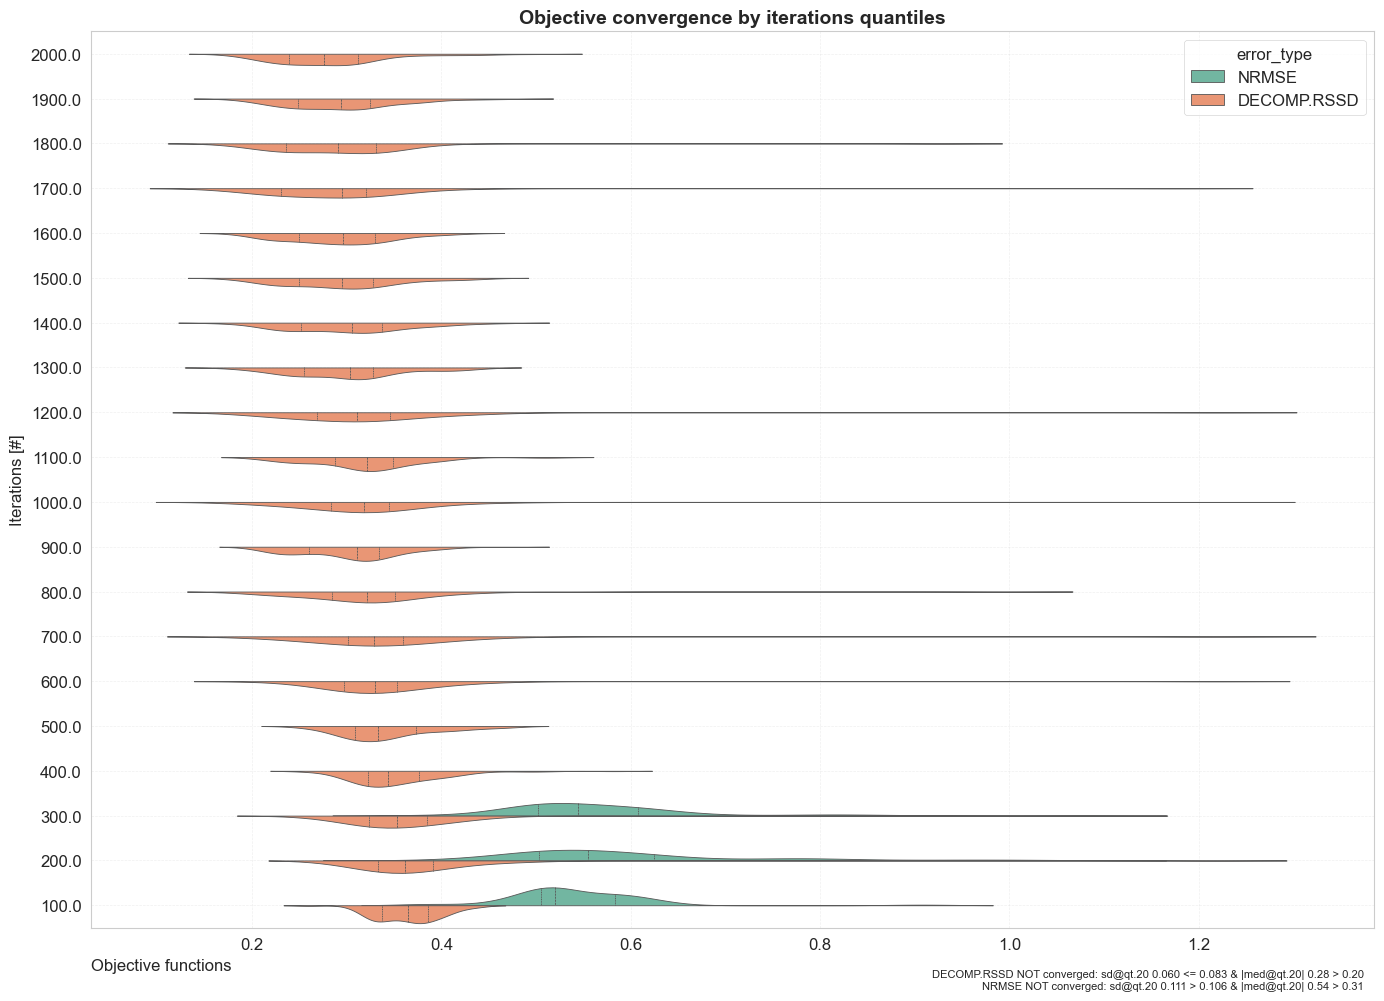

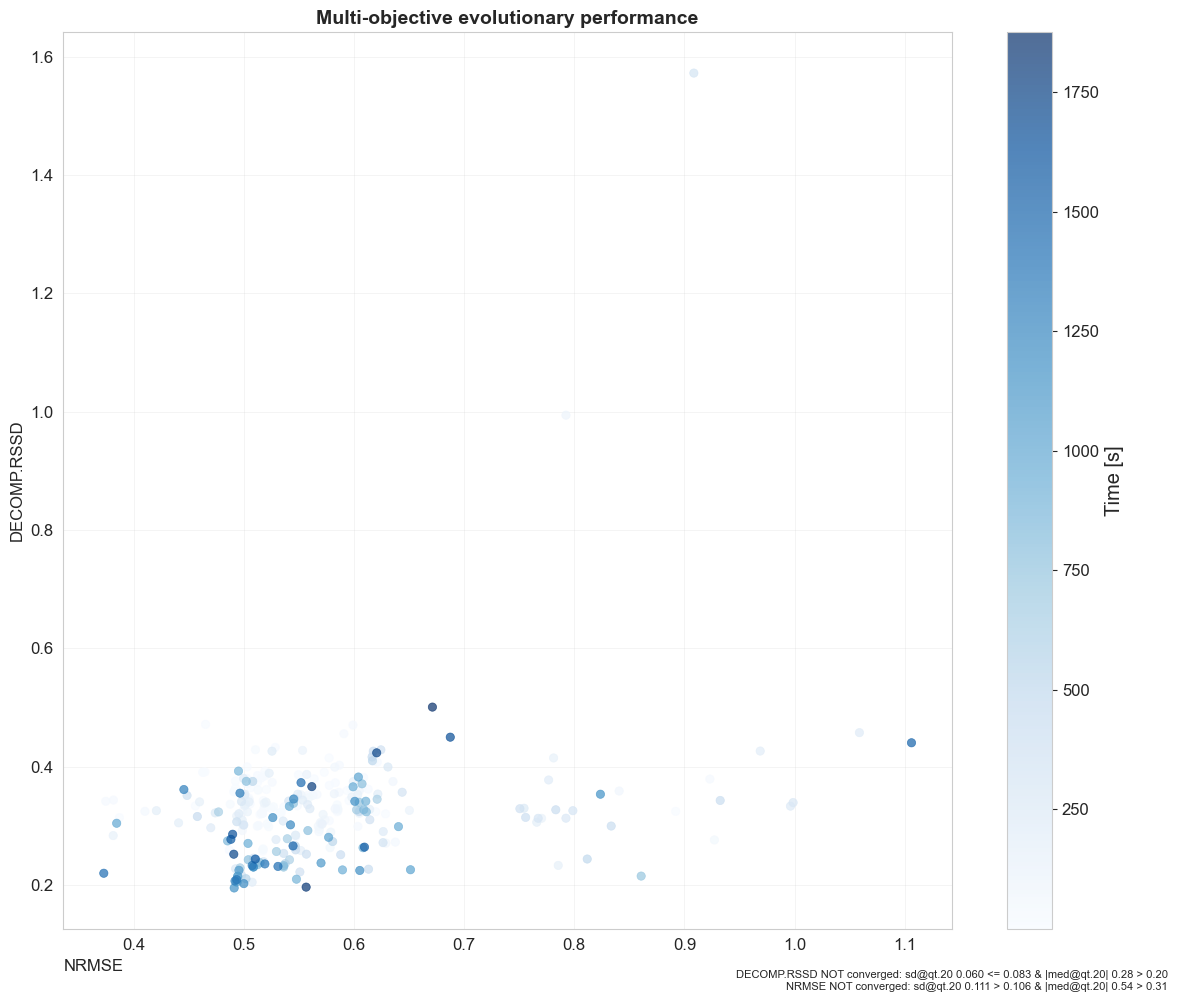

In [98]:
from robyn.modeling.entities.enums import Models, NevergradAlgorithm
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig

trials_config = TrialsConfig(iterations=2000, trials=1)

robyn.train_models(
    trials_config=trials_config,
    ts_validation=True,
    add_penalty_factor=False,
    rssd_zero_penalty=True,
    nevergrad_algo=NevergradAlgorithm.TWO_POINTS_DE,
    model_name=Models.RIDGE,
)

In [99]:
# Create configuration
configs = ClusteringConfig(
    dep_var_type=DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by=ClusterBy.HYPERPARAMETERS,
    max_clusters=10,
    min_clusters=3,
    weights=[1.0, 1.0, 1.0],
)

# First, evaluate models without plots
robyn.evaluate_models(
    cluster_config=configs,
    display_plots=False,  # Disable initial plotting
    export_plots=False
)

INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
INFO: Evaluating models
2025-03-21 06:07:20,211 - robyn.robyn - INFO - Evaluating models
2025-03-21 06:07:20 [INFO] Starting Pareto optimization
2025-03-21 06:07:20,224 - robyn.modeling.pareto.data_aggregator - INFO - Starting model data aggregation
2025-03-21 06:07:20 [INFO] Computing Pareto fronts
2025-03-21 06:07:20 [INFO] Pareto front computation completed
2025-03-21 06:07:20 [INFO] Preparing Pareto data
2025-03-21 06:07:20 [INFO] Number of Pareto-optimal solutions found: 242
2025-03-21 06:07:20 [INFO] Selected 14 Pareto-fronts containing 103 candidates
2025-03-21 06:07:20 [INFO] Selected Pareto fronts: 15
2025-03-21 06:07:20 [INFO] Filtering data for selected Pareto fronts...
2025-03-21 06:07:20 [INFO] Pareto data preparation completed
2025-03-2

In [100]:
pareto_result = robyn.pareto_result

In [101]:
pareto_result

ParetoResult(pareto_solutions=['1_331_1', '1_1042_1', '1_309_1', '1_50_1', '1_88_1', '1_1702_1', '1_107_1', '1_1162_1', '1_596_1', '1_20_1', '1_1796_1', '1_424_1', '1_695_1', '1_1554_1', '1_136_1', '1_1582_1', '1_1822_1', '1_907_1', '1_1348_1', '1_844_1', '1_1678_1', '1_1188_1', '1_1942_1', '1_982_1', '1_1104_1', '1_1434_1', '1_1372_1', '1_1402_1', '1_905_1', '1_922_1', '1_833_1', '1_918_1', '1_934_1', '1_1494_1', '1_1888_1', '1_1059_1', '1_1612_1', '1_1539_1', '1_815_1', '1_1085_1', '1_412_1', '1_1732_1', '1_1642_1', '1_845_1', '1_505_1', '1_1770_1', '1_59_1', '1_1882_1', '1_870_1', '1_1395_1', '1_1584_1', '1_1721_1', '1_29_1', '1_1192_1', '1_1672_1', '1_1674_1', '1_1628_1', '1_1378_1', '1_1164_1', '1_930_1', '1_1552_1', '1_1169_1', '1_1224_1', '1_1342_1', '1_1824_1', '1_485_1', '1_58_1', '1_952_1', '1_31_1', '1_875_1', '1_80_1', '1_89_1', '1_964_1', '1_1528_1', '1_1792_1', '1_1260_1', '1_995_1', '1_392_1', '1_1912_1', '1_785_1', '1_1072_1', '1_1785_1', '1_1762_1', '1_484_1', '1_1468_

INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
INFO: Optimizing budget allocation
2025-03-21 06:08:04,742 - robyn.robyn - INFO - Optimizing budget allocation
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1
INFO: Selected model for budget optimization: 1_331_1

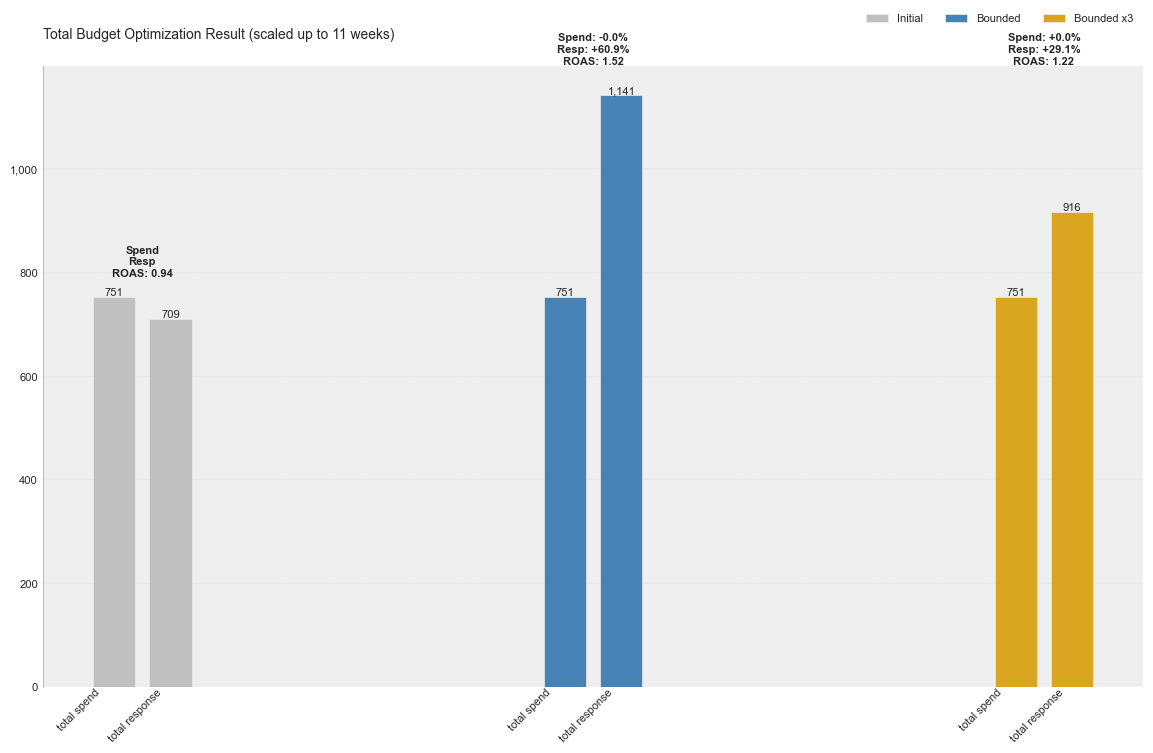

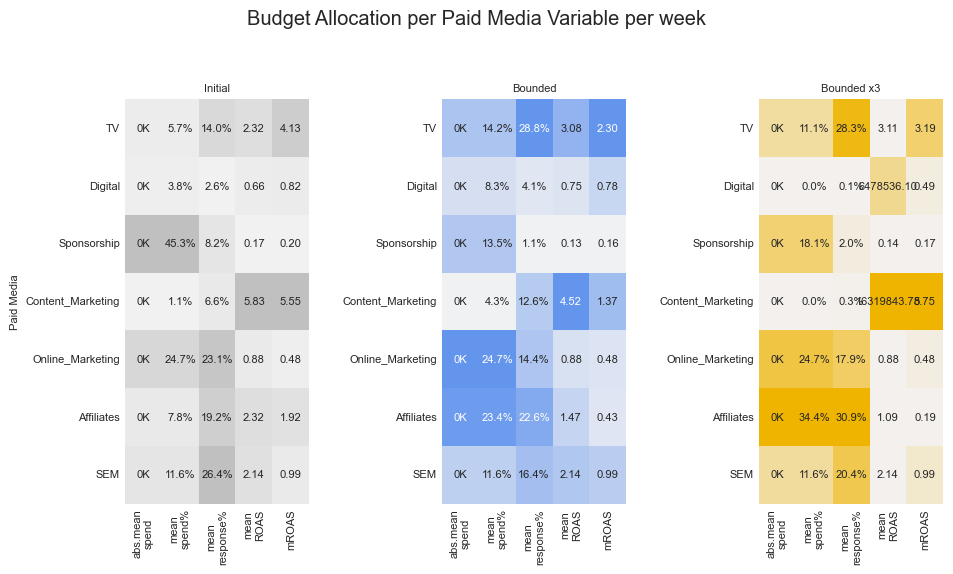

2025-03-21 06:08:05,083 - robyn.visualization.base_visualizer - INFO - Saving multiple plots to: /Users/mauryavardhansingh/Desktop/Budget/output
2025-03-21 06:08:05,221 - robyn.visualization.base_visualizer - INFO - Plot budget_opt saved successfully
2025-03-21 06:08:05,376 - robyn.visualization.base_visualizer - INFO - Plot allocation saved successfully
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
INFO: Budget optimization complete
2025-03-21 06:08:05,376 - robyn.robyn - INFO - Budget optimization complete


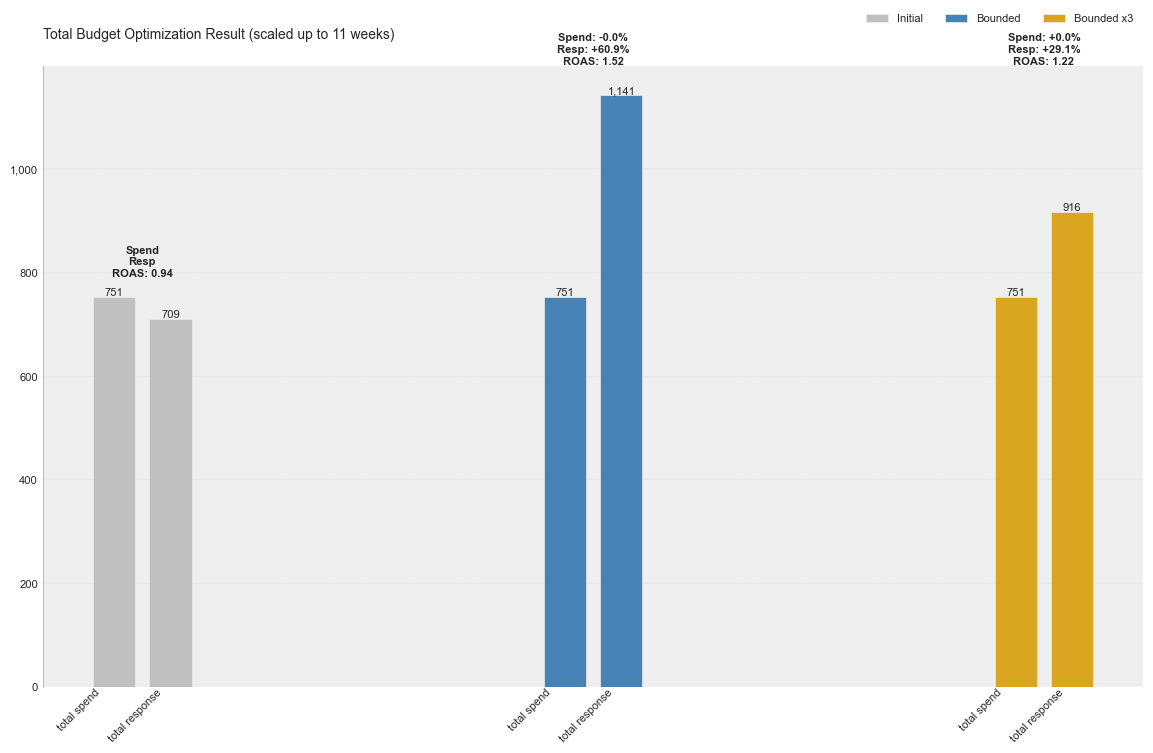

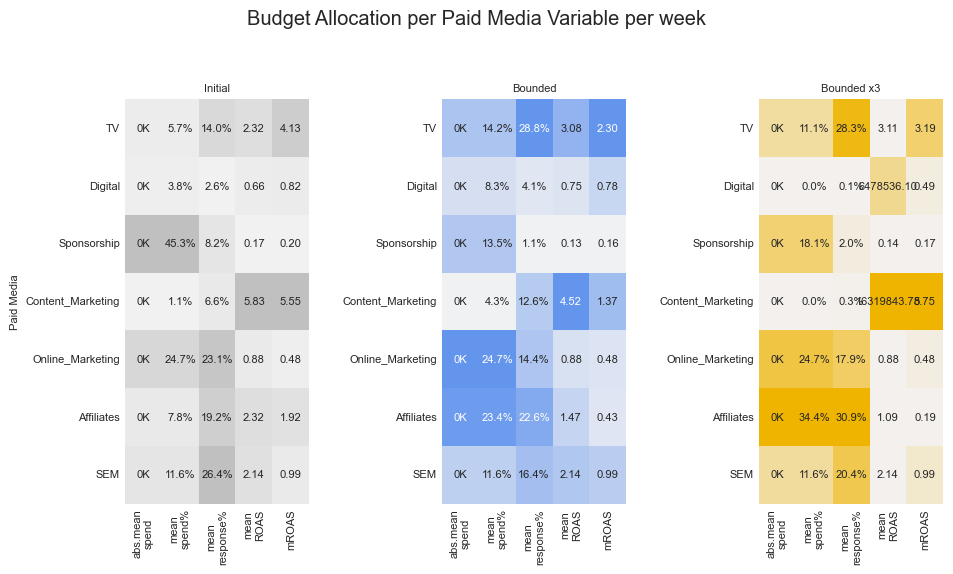

In [103]:
from robyn.allocator.entities.allocation_params import AllocatorParams
from robyn.allocator.constants import (
    SCENARIO_MAX_RESPONSE,
    CONSTRAINT_MODE_EQ,
)

allocator_params = AllocatorParams(
    scenario=SCENARIO_MAX_RESPONSE,
    total_budget=None,  # Uses total spend in date_range when None
    date_range="all",
    channel_constr_low=[0.2],  # Minimum spend multiplier
    channel_constr_up=[2.5, 2.2, 0.8, 4, 1, 3, 1],  # Maximum spend multiplier
    channel_constr_multiplier=3.0,
    optim_algo="SLSQP_AUGLAG",
    maxeval=100000,
    constr_mode=CONSTRAINT_MODE_EQ,
    plots=True,
)

allocation_result = robyn.optimize_budget(
    allocator_params=allocator_params,
    select_model=None,
)